Objective :  Take in PCA data, output cluster data with various models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# input PCA data
path = path = "D:/milestone project/SIADS_694_695_Milestone_II/"
train_file = path + "data/X_train_pca.csv"
PCA_X_train = pd.read_csv(train_file)

In [16]:
PCA_X_train.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_train.set_index('CellID', inplace = True)
PCA_X_train.shape

(40348, 100)

In [17]:
PCA_X_train.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_91,PC_92,PC_93,PC_94,PC_95,PC_96,PC_97,PC_98,PC_99,PC_100
CellID,,,,,,,,,,,,,,,,,,,,,
TCAGCTCCACTGTTAG_18,-4.992897,1.977498,2.635594,0.294221,-0.352566,0.480022,-0.607563,0.537431,0.354954,0.988225,...,-0.462457,0.087501,-0.052739,0.556482,0.054646,0.224667,-0.169349,0.542468,-0.846616,0.508633
TGCTGCTTCGTGGTCG_24,10.464980,-4.179799,10.248424,13.373024,-0.398263,-1.284958,2.211709,0.475666,-0.210211,2.024235,...,-1.277020,1.558242,-0.576477,0.078703,4.163578,-2.982152,2.011843,-2.500248,-2.785146,-0.459969
TAAACCGAGCCAGTTT_23,11.897502,10.368381,-9.752729,-0.730838,-6.437631,-3.039107,1.155987,-0.674261,1.225245,0.872170,...,-1.720728,2.017200,-0.437286,-0.466728,1.741292,2.205787,0.025304,0.891656,0.706868,-0.884583
GTAGTCACAGACAAGC_16,0.143768,-8.355670,-4.339652,-0.964086,1.019567,-0.285466,-0.621729,-0.871517,0.075749,-0.569461,...,-0.432216,0.092154,-0.113035,-0.005142,1.322794,-0.699368,0.830745,0.142501,0.077562,-0.580459
CTAATGGGTCCAACTA_14,-4.288423,1.525256,2.442547,-1.382999,0.668757,2.043472,-2.643853,1.329935,-2.210888,-2.007608,...,0.774587,0.386319,0.501365,-2.406939,-0.897188,0.785342,1.719547,1.565029,1.475988,2.158263


In [12]:
y_train_file = path + "data/y_train.csv"
y_train = pd.read_csv(y_train_file)

In [19]:
y_train.set_index('CellID', inplace = True)
y_train

,type
CellID,
TCAGCTCCACTGTTAG_18,CD4 T
TGCTGCTTCGTGGTCG_24,Endothelial
TAAACCGAGCCAGTTT_23,Tumor
GTAGTCACAGACAAGC_16,Myeloid
CTAATGGGTCCAACTA_14,CD8 T
...,...
CTACGTCAGTTACGGG_23,CD8 T
AGGTCATAGCTCCCAG_19,Tumor
GGATTACAGCACACAG_23,CD8 T


In [28]:
#number of unique labels
print("number of cell types", len(y_train.type.unique()))
labels  = y_train.type.unique()

number of cell types 14


Agglomerative Clustering - Given the type of data we have, I have high hopes this will be usefull.

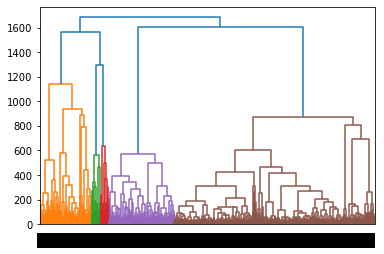

In [23]:
# Create model and plot
# the ward function created the model
from scipy.cluster.hierarchy import ward, dendrogram, fcluster
plt.figure()
model = ward(PCA_X_train)
dendrogram(model)
plt.show()

Source:  https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [32]:
#create labels from the aggolmerative clustering to test 
k=14  # number of clusters
agglo_labels  = fcluster(model, k, criterion='maxclust')
len(agglo_labels)

40348

If we have ground truth labels, metrics to use

In [46]:
from sklearn import metrics
agglo_adjrand = metrics.adjusted_rand_score(y_train.type.values, agglo_labels)
agglo_homogeneity = metrics.homogeneity_score(y_train.type.values, agglo_labels)
agglo_vmeasure = metrics.v_measure_score(y_train.type.values, agglo_labels)
agglo_complete = metrics.completeness_score(y_train.type.values, agglo_labels)

In [50]:
print("Homogeneity", agglo_homogeneity)
print("Completeness", agglo_complete)
print("V-measure", agglo_vmeasure)
print("Adjusted Rand Index", agglo_adjrand)


Homogeneity 0.7629973418122455
Completeness 0.7587145328649937
V-measure 0.7608499104248575
Adjusted Rand Index 0.6958801369312123


In [40]:
y_train.type.values

array(['CD4 T', 'Endothelial', 'Tumor', ..., 'CD8 T', 'CD4 T', 'CD4 T'],
      dtype=object)

In [51]:
#silhoutte chart here